In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

## 生成数据集

y = Xw + b + epsilon, epsilon 服从正态分布, 是高斯噪声

In [2]:
# 第一个参数是u，第二个是sigma，第三个是shape
torch.normal(0,1,(100,2))

tensor([[-0.8992, -0.4078],
        [-1.5363,  0.3217],
        [-0.6900,  1.0452],
        [-0.3306, -0.9239],
        [-0.5398,  0.9139],
        [ 0.4922,  0.1858],
        [-0.4368,  0.3294],
        [ 1.9945, -1.1812],
        [-0.9273,  0.1103],
        [ 0.4707,  1.9499],
        [ 0.1636,  1.4313],
        [ 0.7884, -0.5757],
        [ 1.1309, -0.7084],
        [-0.6866,  1.2716],
        [ 0.8185, -0.7419],
        [ 1.0214,  0.1112],
        [ 0.8202,  0.8406],
        [ 1.1265,  1.2602],
        [ 0.1052,  0.3855],
        [-0.1435,  0.7368],
        [ 0.2872, -1.4439],
        [-0.8063, -3.2381],
        [-1.0937,  1.6028],
        [-1.7900,  0.5155],
        [ 0.6390,  1.5018],
        [-0.1171, -1.4850],
        [-0.9749, -0.5466],
        [-0.3315,  0.6552],
        [-0.1040,  0.3809],
        [ 1.6176, -1.0140],
        [-1.7507,  1.2473],
        [-0.0534, -0.1592],
        [ 1.5197, -0.0114],
        [-0.2474, -0.9767],
        [-0.2717,  0.3894],
        [-0.7312,  1

### matmul, 矩阵乘法

In [3]:
x = torch.arange(0,10,1).reshape(2,-1)
print(x.shape)
print(x.dtype)
print(x)

torch.Size([2, 5])
torch.int64
tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [4]:
w = torch.tensor(list(range(0,5)))
print(w)
print(w.dtype)

tensor([0, 1, 2, 3, 4])
torch.int64


In [5]:
torch.matmul(x,w)

tensor([30, 80])

In [6]:
w = torch.tensor(list(range(0,5))).reshape((5,-1))
print(w)

tensor([[0],
        [1],
        [2],
        [3],
        [4]])


In [7]:
torch.matmul(x,w)

tensor([[30],
        [80]])

In [8]:
def data(w:torch.Tensor,b,sample_number):
    x = torch.normal(0,1,(sample_number,w.shape[0]))
    y = torch.matmul(x,w) + b + torch.normal(0,0.01,(sample_number,))
    return x,y

In [9]:
w = torch.tensor([2,-3.4])
b = 4.2

In [10]:
features,labels = data(w,b,1000)

In [11]:
features.shape,labels.shape

(torch.Size([1000, 2]), torch.Size([1000]))

### 绘制加了噪声后的散点图

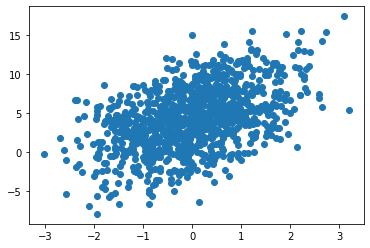

In [12]:
plt.scatter(features[:,0],labels,label = "y=2*x1-3.4*x2+4.2, x1, with noise")

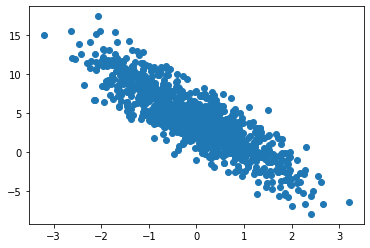

In [13]:
plt.scatter(features[:,1],labels,label="y=2*x1-3.4*x2+4.2, x2, with noise")

## 随机取样

In [14]:
# batch_size是每次取样的数量
# 最后一次取样时，可能出现样本数<batch_size的情况
import random


def get_sample(features,labels,batch_size):
    indices = list(range(0,len(labels)))
    random.shuffle(indices) # 打乱下标顺序，直接对源数据进行修改
    for i in range(0,len(labels),batch_size):
        index = indices[i:min(i+batch_size,len(labels))]
        yield features[index],labels[index]

In [15]:
batch_size = 10
features,labels

(tensor([[-1.1156, -0.3296],
         [ 1.3139,  0.3546],
         [ 0.4436,  0.5676],
         ...,
         [-0.0487,  0.4146],
         [ 0.5107, -1.2215],
         [ 0.4360, -0.4123]]),
 tensor([ 3.0786e+00,  5.6242e+00,  3.1577e+00, -4.4748e-01,  9.0894e-01,
          3.2125e+00,  3.8273e+00,  6.8827e+00,  4.1593e+00,  3.2322e+00,
          1.5194e+00, -4.0900e-01,  7.3924e+00,  4.0091e+00,  5.0860e+00,
          5.3574e+00, -2.0622e+00,  4.4068e+00,  4.6571e+00,  2.4908e+00,
          3.5069e+00,  7.4684e+00,  6.0680e+00,  6.5200e+00,  5.7335e+00,
          5.4053e-01, -5.7993e-01,  2.0484e+00,  8.3564e+00,  9.2606e+00,
          4.4252e+00,  5.1650e+00,  4.4689e+00,  7.4764e+00,  1.1414e+01,
          2.4820e+00,  3.0740e+00,  5.8940e+00,  3.5938e+00,  1.0801e+01,
          5.7966e+00,  8.3860e+00,  9.1499e+00,  1.9512e+00,  5.0803e+00,
          8.9081e+00,  1.1816e+01,  5.0172e+00,  7.6969e+00,  9.9698e+00,
          1.0270e+00, -7.1350e-01,  1.0417e+01,  8.4022e+00,  7.0583e+

In [16]:
for x,y in get_sample(features,labels,batch_size):
    print(x,y)

tensor([[ 0.1880, -1.5921],
        [-0.1879,  0.1107],
        [ 0.7831, -1.0403],
        [-0.4375,  2.1184],
        [ 0.8994,  0.8926],
        [ 0.6701, -1.0903],
        [ 2.3386,  0.3232],
        [-0.8838,  0.3024],
        [-1.3360, -0.2256],
        [ 0.8528, -0.8710]]) tensor([ 9.9719,  3.4519,  9.2985, -3.8695,  2.9471,  9.2554,  7.7697,  1.4128,
         2.2932,  8.8585])
tensor([[-1.4769, -1.8112],
        [ 0.0818, -2.4237],
        [-1.8493, -0.2532],
        [ 1.3185,  0.4442],
        [ 0.0179,  0.3032],
        [-0.2678,  0.8803],
        [-0.2546, -1.6062],
        [ 0.0868, -0.4195],
        [ 0.4930,  1.2113],
        [ 0.5961,  0.8802]]) tensor([ 7.4015, 12.5851,  1.3577,  5.3100,  3.2047,  0.6842,  9.1592,  5.7966,
         1.0641,  2.4088])
tensor([[-0.7074, -1.2304],
        [-0.9441,  0.9323],
        [-0.9179, -0.4523],
        [-0.5895, -0.5520],
        [ 1.1694,  0.3766],
        [-0.5264, -2.6200],
        [ 0.3030, -1.4549],
        [ 1.5327,  1.1247],


## 计算模型参数

### 初始化模型参数

后面使用随机梯度下降来优化模型参数, 所以参数的初始值可以任意设定

In [17]:
w = torch.normal(0,0.01,(2,),requires_grad=True)
b = torch.zeros((1,),requires_grad=True)

## 定义模型

In [18]:
# 线性回归模型
def linear_regression(x,w,b):
    return torch.matmul(x,w)+b

## 定义损失函数

In [19]:
# 采用均方损失函数
def square_loss_function(y_hat,y):
    return 0.5*(y_hat-y)**2

## 定义优化算法（模型参数如何更新）

In [20]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            # print(param,param.grad)
            param -= lr/batch_size*param.grad
            param.grad.zero_()
            # print(param,param.grad)
            

## 训练

### 初始化

In [21]:
lr = 0.03 # 学习率
epochs = 10 # 学习轮数
net = linear_regression # 网络结构，这里就是一个线性回归模型
loss = square_loss_function # 损失函数
batch_size

10

### 训练

In [22]:
for epoch in range(epochs):
    for X,y in get_sample(features,labels,batch_size):
        y_hat = net(X,w,b)
        l = loss(y_hat,y)
        l.sum().backward() # 反向传播，然后才能计算w、b的梯度
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        l = loss(net(features,w,b),labels)
        print(f"epoch:{epoch}, loss: {l.mean()}, w: {w[0],w[1]}, b: {b[0]}")

        
        

epoch:0, loss: 0.029138870537281036, w: (tensor(1.9026, requires_grad=True), tensor(-3.2771, requires_grad=True)), b: 4.022641658782959
epoch:1, loss: 9.765474533196539e-05, w: (tensor(1.9959, requires_grad=True), tensor(-3.3953, requires_grad=True)), b: 4.19231653213501
epoch:2, loss: 4.943676322000101e-05, w: (tensor(1.9999, requires_grad=True), tensor(-3.3996, requires_grad=True)), b: 4.1999053955078125
epoch:3, loss: 4.951323717250489e-05, w: (tensor(2.0001, requires_grad=True), tensor(-3.4000, requires_grad=True)), b: 4.200074672698975
epoch:4, loss: 4.969184738001786e-05, w: (tensor(2.0000, requires_grad=True), tensor(-3.3991, requires_grad=True)), b: 4.200308799743652
epoch:5, loss: 4.9607759137870744e-05, w: (tensor(2.0004, requires_grad=True), tensor(-3.3995, requires_grad=True)), b: 4.200036525726318
epoch:6, loss: 4.946690023643896e-05, w: (tensor(1.9998, requires_grad=True), tensor(-3.3998, requires_grad=True)), b: 4.2001118659973145
epoch:7, loss: 4.945242835674435e-05, w: